# Zero Shot GPT Prompting

In [1]:
import pandas as pd
import os
from IPython.display import Image, display
from openai import OpenAI
import base64
import dotenv
from dotenv import load_dotenv
import gpt_utils

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# Load OpenAI API key for this project
dotenv.load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]
client = OpenAI()

## Load Data 
[Stanford Cars dataset](https://paperswithcode.com/dataset/stanford-cars).

In [4]:
df = pd.read_csv('/scratch/shared/image_ai_HHT_data/train.csv', 
                 usecols=['image', 'Class', 'Class Name'])

In [5]:
df.shape

(5700, 3)

In [6]:
df.head()

,Class,image,Class Name
0,178,07149.jpg,Scion xD Hatchback 2012
1,24,06852.jpg,Audi S4 Sedan 2007
2,115,06627.jpg,Ford Focus Sedan 2007
3,4,06099.jpg,Acura TL Type-S 2008
4,105,05651.jpg,Fisker Karma Sedan 2012


In [7]:
image_dir = '/scratch/shared/image_ai_HHT_data/images/'

In [8]:
# Add image path column
df['image_path'] = image_dir + df['image']

## Example 1

In [18]:
df[df['image'] == "00002.jpg"]

,Class,image,Class Name,image_path
1752,3,00002.jpg,Acura TL Sedan 2012,/scratch/shared/image_ai_HHT_data/images/00002.jpg


In [19]:
test_image = df[df['image'] == "00002.jpg"]['image_path'].values[0]

In [20]:
test_image

'/scratch/shared/image_ai_HHT_data/images/00002.jpg'

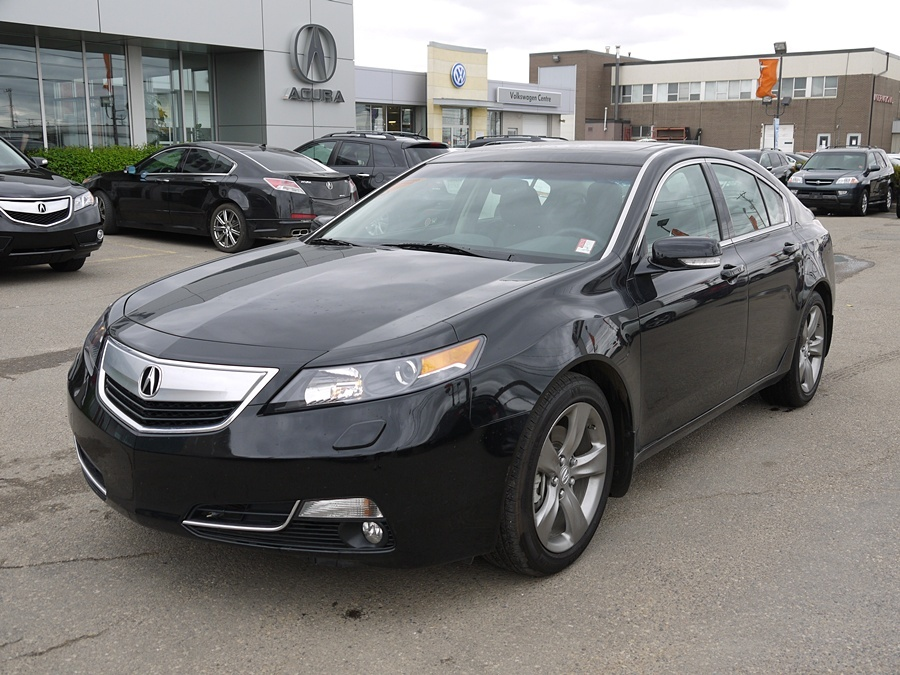

In [21]:
display(Image(filename=test_image))

In [22]:
model = "gpt-4o-2024-08-06"

In [23]:
encoded_image = gpt_utils.encode_image(test_image)
image_content = {
    "type": "image_url",
    "image_url": {
        "url": f"data:image/png;base64,{encoded_image}"}}

In [24]:
completion = client.chat.completions.create(
  model = model,
  messages = [  {"role": "user", "content": [{
                        "type": "text",
                        "text": "What is the make, model and year of the car in the image?" },
                    image_content
                ]}])
print(completion.choices[0].message)

ChatCompletionMessage(content='The car in the image is an Acura TL, likely from between 2009 and 2014.', refusal=None, role='assistant', function_call=None, tool_calls=None)


## Example 2

In [9]:
df[df['image'] == "08119.jpg"]

,Class,image,Class Name,image_path
2076,67,08119.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/08119.jpg


In [10]:
test_image = df[df['image'] == "08119.jpg"]['image_path'].values[0]

In [11]:
test_image

'/scratch/shared/image_ai_HHT_data/images/08119.jpg'

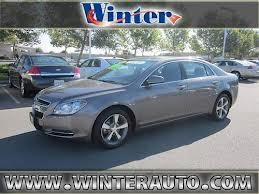

In [12]:
display(Image(filename=test_image))

In [13]:
model = "gpt-4o-2024-08-06"

In [14]:
encoded_image = gpt_utils.encode_image(test_image)
image_content = {
    "type": "image_url",
    "image_url": {
        "url": f"data:image/png;base64,{encoded_image}"}}

In [15]:
completion = client.chat.completions.create(
  model = model,
  messages = [  {"role": "user", "content": [{
                        "type": "text",
                        "text": "What is the make, model and year of the car in the image?" },
                    image_content
                ]}])
print(completion.choices[0].message)

ChatCompletionMessage(content='The car in the image is a Chevrolet Malibu, specifically from around the 2011 model year.', refusal=None, role='assistant', function_call=None, tool_calls=None)


In [16]:
for i in range(10):
    completion = client.chat.completions.create(
    model = model,
    messages = [  {"role": "user", "content": [{
                            "type": "text",
                            "text": "What is the make, model and year of the car in the image?" },
                        image_content
                    ]}])
    print(f'{i} try: {completion.choices[0].message}')

0 try: ChatCompletionMessage(content='The car in the image is a Chevrolet Malibu. The design suggests it is from around the 2008-2012 model years.', refusal=None, role='assistant', function_call=None, tool_calls=None)
1 try: ChatCompletionMessage(content='The car in the image is a Chevrolet Malibu, likely from the model years around 2011 to 2013.', refusal=None, role='assistant', function_call=None, tool_calls=None)
2 try: ChatCompletionMessage(content='The image shows a Chevrolet Malibu from around the 2010-2012 model years.', refusal=None, role='assistant', function_call=None, tool_calls=None)
3 try: ChatCompletionMessage(content='The car in the image appears to be a Chevrolet Malibu from the model years around 2008-2012.', refusal=None, role='assistant', function_call=None, tool_calls=None)
4 try: ChatCompletionMessage(content='The car in the image is a Chevrolet Malibu, likely from the model years 2010-2012 based on the design features visible.', refusal=None, role='assistant', fun

## Example 3: Predict Year of the Car in the Image

In [26]:
gpt_utils.make_test_data(df)

In [27]:
df_test = pd.read_csv("data/test-df.csv")

In [28]:
df_test.shape

(20, 5)

In [29]:
model = "gpt-4o-2024-08-06"

In [30]:
df_test.head()

,Class,image,Class Name,image_path,Ground Truth Year
0,67,02502.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/02502.jpg,2010
1,20,00600.jpg,Audi S6 Sedan 2011,/scratch/shared/image_ai_HHT_data/images/00600.jpg,2011
2,67,03998.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/03998.jpg,2010
3,97,00054.jpg,Dodge Charger SRT-8 2009,/scratch/shared/image_ai_HHT_data/images/00054.jpg,2009
4,96,04211.jpg,Dodge Charger Sedan 2012,/scratch/shared/image_ai_HHT_data/images/04211.jpg,2012


In [31]:
# Initialize an empty list to store responses
responses = []

# Loop over the images
for idx, row in df_test.iterrows():
    print(f'i: {idx}')
    print(row)
    image_filename = row['image']
    
    # Construct the full path to the image
    image_path = os.path.join(f'{image_dir}', image_filename)  
    print(f'image_path: {image_path}')
    
    # Check if the image file exists
    if not os.path.isfile(image_path):
        print(f"Image file not found: {image_path}")
        responses.append(None)
        continue
    
    # Encode the image
    encoded_image = gpt_utils.encode_image(image_path)
    
    # Prepare the image content for the API
    image_content = {
        "type": "image_url",
        "image_url": {
            "url": f"data:image/png;base64,{encoded_image}"
        }
    }
    
    # Prepare the messages payload
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What is the year of the car in the image?"
                },
                image_content
            ]
        }
    ]
    
    try:
        # Send the request to the GPT model
        completion = client.chat.completions.create(
            model = model,  
            messages = messages
        )
        
        # Extract the assistant's reply
        reply = completion.choices[0].message.content
        responses.append(reply)
        print(f'response: {reply}')
        
    except Exception as e:
        print(f"An error occurred: {e}")
        responses.append(None)

i: 0
Class                                                                67
image                                                         02502.jpg
Class Name                           Chevrolet Malibu Hybrid Sedan 2010
image_path           /scratch/shared/image_ai_HHT_data/images/02502.jpg
Ground Truth Year                                                  2010
Name: 0, dtype: object
image_path: /scratch/shared/image_ai_HHT_data/images/02502.jpg
response: The car in the image is a Chevrolet Malibu from the model years 2008 to 2012.
i: 1
Class                                                                20
image                                                         00600.jpg
Class Name                                           Audi S6 Sedan 2011
image_path           /scratch/shared/image_ai_HHT_data/images/00600.jpg
Ground Truth Year                                                  2011
Name: 1, dtype: object
image_path: /scratch/shared/image_ai_HHT_data/images/00600.jpg
response: 

In [32]:
# Add the responses to the DataFrame
df_test['GPT_Response'] = responses

In [33]:
df_test.head()

,Class,image,Class Name,image_path,Ground Truth Year,GPT_Response
0,67,02502.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/02502.jpg,2010,The car in the image is a Chevrolet Malibu from the model years 2008 to 2012.
1,20,00600.jpg,Audi S6 Sedan 2011,/scratch/shared/image_ai_HHT_data/images/00600.jpg,2011,The car in the image is an Audi S6 from the model years 2008 to 2011.
2,67,03998.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/03998.jpg,2010,The car in the image appears to be a Chevrolet Malibu from the 2008 model year.
3,97,00054.jpg,Dodge Charger SRT-8 2009,/scratch/shared/image_ai_HHT_data/images/00054.jpg,2009,The car in the image is a Dodge Charger SRT8 Super Bee. This particular version was produced in 2012.
4,96,04211.jpg,Dodge Charger Sedan 2012,/scratch/shared/image_ai_HHT_data/images/04211.jpg,2012,"The car in the image is a Dodge Charger, likely from around 2011 to 2014 based on its design and body style."


In [34]:
df_test.to_csv("results/zero-shot-responses.csv", index=False)

## Post-process and Compute Accuracy

In [35]:
df_test = pd.read_csv("results/zero-shot-responses.csv")

In [36]:
df_test.head()

,Class,image,Class Name,image_path,Ground Truth Year,GPT_Response
0,67,02502.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/02502.jpg,2010,The car in the image is a Chevrolet Malibu from the model years 2008 to 2012.
1,20,00600.jpg,Audi S6 Sedan 2011,/scratch/shared/image_ai_HHT_data/images/00600.jpg,2011,The car in the image is an Audi S6 from the model years 2008 to 2011.
2,67,03998.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/03998.jpg,2010,The car in the image appears to be a Chevrolet Malibu from the 2008 model year.
3,97,00054.jpg,Dodge Charger SRT-8 2009,/scratch/shared/image_ai_HHT_data/images/00054.jpg,2009,The car in the image is a Dodge Charger SRT8 Super Bee. This particular version was produced in 2012.
4,96,04211.jpg,Dodge Charger Sedan 2012,/scratch/shared/image_ai_HHT_data/images/04211.jpg,2012,"The car in the image is a Dodge Charger, likely from around 2011 to 2014 based on its design and body style."


In [37]:
df_test['Ground Truth Year'].value_counts()

Ground Truth Year
2010    5
2011    5
2009    5
2012    5
Name: count, dtype: int64

In [38]:
df_test = gpt_utils.is_prediction_correct(df_test)

In [39]:
df_test.head()

,Class,image,Class Name,image_path,Ground Truth Year,GPT_Response,Predicted Years,Correct Prediction
0,67,02502.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/02502.jpg,2010,The car in the image is a Chevrolet Malibu from the model years 2008 to 2012.,"[2008, 2009, 2010, 2011, 2012]",True
1,20,00600.jpg,Audi S6 Sedan 2011,/scratch/shared/image_ai_HHT_data/images/00600.jpg,2011,The car in the image is an Audi S6 from the model years 2008 to 2011.,"[2008, 2009, 2010, 2011]",True
2,67,03998.jpg,Chevrolet Malibu Hybrid Sedan 2010,/scratch/shared/image_ai_HHT_data/images/03998.jpg,2010,The car in the image appears to be a Chevrolet Malibu from the 2008 model year.,[2008],False
3,97,00054.jpg,Dodge Charger SRT-8 2009,/scratch/shared/image_ai_HHT_data/images/00054.jpg,2009,The car in the image is a Dodge Charger SRT8 Super Bee. This particular version was produced in 2012.,[2012],False
4,96,04211.jpg,Dodge Charger Sedan 2012,/scratch/shared/image_ai_HHT_data/images/04211.jpg,2012,"The car in the image is a Dodge Charger, likely from around 2011 to 2014 based on its design and body style.","[2011, 2012, 2013, 2014]",True


In [40]:
accuracy = df_test['Correct Prediction'].mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.00%


In [41]:
# Analyze which car models have higher prediction rates (predicted correct year)

Correct Prediction                  False  True  Total  Accuracy
Class Name                                                      
Audi S6 Sedan 2011                      2     3      5       0.6
Chevrolet Malibu Hybrid Sedan 2010      3     2      5       0.4
Dodge Charger SRT-8 2009                2     3      5       0.6
Dodge Charger Sedan 2012                2     3      5       0.6


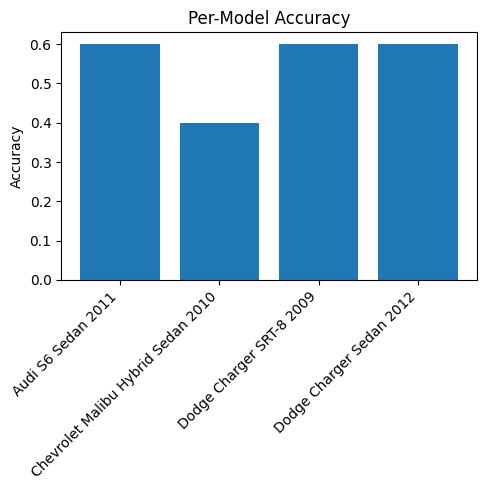

In [42]:
gpt_utils.plot_per_model_accuracy(df_test)